# Sheet 5

In [1]:
import os
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt

## 2 Logistic regression: an LLM lie detector

Download the data from https://heibox.uni-heidelberg.de/f/38bd3f2a9b7944248cc2/   
Unzip it and place the lie_detection folder in the folder named `data` to get the following structure:
"data/lie_detection/datasets" and "data/lie_detection/acts".

This is how you can load a dataset of LLM activations. Use a new Datamanager if you want to have a new dataset. Use the same data manager if you want to combine datasets.

In [71]:
from lie_detection_utils import DataManager
import sklearn.linear_model as sk


path_to_datasets = "data/lie_detection/datasets"
path_to_acts = "data/lie_detection/acts"

# check if the datasets and activations are available
assert os.path.exists(path_to_datasets), "The path to the datasets does not exist."
assert os.path.exists(path_to_acts), "The path to the activations does not exist."

# these are the different datasets containing true and false factual statements about different topics
dataset_names = ["cities", "neg_cities", "sp_en_trans", "neg_sp_en_trans"]

for i in range(4):
    dataset_name = dataset_names[i] # choose some dataset from the above datasets, index "0" loads the "cities" dataset for example

    # the dataloader automatically loads the training data for us
    dm = DataManager()
    dm.add_dataset(dataset_name, "Llama3", "8B", "chat", layer=12, split=0.8, center=False,
                    device='cpu', path_to_datasets=path_to_datasets, path_to_acts=path_to_acts)
    acts_train, labels_train = dm.get('train') # train set
    acts_test, labels_test = dm.get('val')
    


    log_res = sk.LogisticRegression(penalty = None)
    log_res.fit(acts_train, labels_train)

    print("The dataset is ", dataset_name)
    print("The accuracy with the training set is ", log_res.score(acts_train, labels_train))
    print("The accuracy with the test set is ", log_res.score(acts_test, labels_test))
    if log_res.score(acts_train, labels_train) > 0.9 and log_res.score(acts_test, labels_test) > 0.9:
        print(f"Conclusion: The data for {dataset_name} is linearly separable.")
    else:
        print(f"Conclusion: The data for {dataset_name} is not linearly separable.")
        
print("Shapes are, ", acts_train.shape, labels_train.shape)

c:\Users\roger\Documents\CodisHD\ML\sheet5\lie_detection_utils.py:20: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  acts = [t.load(os.path.join(directory, f'layer_{layer}_{i

The dataset is  cities
The accuracy with the training set is  1.0
The accuracy with the test set is  1.0
Conclusion: The data for cities is linearly separable.


c:\Users\roger\Documents\CodisHD\ML\sheet5\lie_detection_utils.py:20: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  acts = [t.load(os.path.join(directory, f'layer_{layer}_{i

The dataset is  neg_cities
The accuracy with the training set is  1.0
The accuracy with the test set is  1.0
Conclusion: The data for neg_cities is linearly separable.
The dataset is  sp_en_trans
The accuracy with the training set is  1.0
The accuracy with the test set is  1.0
Conclusion: The data for sp_en_trans is linearly separable.


c:\Users\roger\Documents\CodisHD\ML\sheet5\lie_detection_utils.py:20: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  acts = [t.load(os.path.join(directory, f'layer_{layer}_{i

The dataset is  neg_sp_en_trans
The accuracy with the training set is  1.0
The accuracy with the test set is  1.0
Conclusion: The data for neg_sp_en_trans is linearly separable.
Shapes are,  torch.Size([283, 4096]) torch.Size([283])


In [51]:
# have a look at the statements that were fed to the LLM to produce the activations:
df = pd.read_csv(f"{path_to_datasets}/{dataset_name}.csv")
print(df.head(10))

                                           statement  label
0   The Spanish word 'con' does not mean 'to speak'.      1
1        The Spanish word 'uno' does not mean 'one'.      0
2  The Spanish word 'tener' does not mean 'to have'.      0
3   The Spanish word 'caliente' does not mean 'hot'.      0
4   The Spanish word 'palabra' does not mean 'word'.      0
5       The Spanish word 'pero' does not mean 'but'.      0
6      The Spanish word 'o' does not mean 'octopus'.      1
7         The Spanish word 'de' does not mean 'now'.      1
8          The Spanish word 'y' does not mean 'and'.      0
9       The Spanish word 'otro' does not mean 'hot'.      1


# b

In [65]:
# these are the different datasets containing true and false factual statements about different topics
dataset_names = ["cities", "neg_cities", "sp_en_trans", "neg_sp_en_trans"]
log_res = [0]*4

dataset_name = dataset_names[0] # choose some dataset from the above datasets, index "0" loads the "cities" dataset for example

# the dataloader automatically loads the training data for us
dm = DataManager()
dm.add_dataset(dataset_name, "Llama3", "8B", "chat", layer=12, split=0.8, center=False,
                device='cpu', path_to_datasets=path_to_datasets, path_to_acts=path_to_acts)
acts_train_cities, labels_train_cities = dm.get('train') # train set
acts_test_cities, labels_test_cities = dm.get('val')


regularization = [None, "l2"]

for reg in regularization:
    log_res_cities = sk.LogisticRegression(penalty = reg, tol = 1e-4)
    log_res_cities.fit(acts_train_cities, labels_train_cities)

    for i in range(len(dataset_names) - 1):
        dataset_name = dataset_names[i + 1] # choose some dataset from the above datasets, index "0" loads the "cities" dataset 

        dm.add_dataset(dataset_name, "Llama3", "8B", "chat", layer=12, split=0.8, center=False,
                        device='cpu', path_to_datasets=path_to_datasets, path_to_acts=path_to_acts)
        acts_train, labels_train = dm.get('train') # train set
        acts_test, labels_test = dm.get('val')

        print("The dataset is ", dataset_name)
        print("The regularization is ", str(reg))
        print("The accuracy with the test set is ", log_res_cities.score(acts_test, labels_test))

c:\Users\roger\Documents\CodisHD\ML\sheet5\lie_detection_utils.py:20: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  acts = [t.load(os.path.join(directory, f'layer_{layer}_{i

The dataset is  neg_cities
The regularization is  None
The accuracy with the test set is  0.76
The dataset is  sp_en_trans
The regularization is  None
The accuracy with the test set is  0.7794336810730254
The dataset is  neg_sp_en_trans
The regularization is  None
The accuracy with the test set is  0.7560646900269542
The dataset is  neg_cities
The regularization is  l2
The accuracy with the test set is  0.7520215633423181
The dataset is  sp_en_trans
The regularization is  l2
The accuracy with the test set is  0.7520215633423181
The dataset is  neg_sp_en_trans
The regularization is  l2
The accuracy with the test set is  0.7560646900269542


c:\Users\roger\Documents\CodisHD\ML\sheet5\lie_detection_utils.py:20: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  acts = [t.load(os.path.join(directory, f'layer_{layer}_{i

Negation introduces linguistic complexity (e.g., "not") that might require the model to learn specific patterns. This makes the data distribution less linearly separable, especially when the model is trained only on non-negated sentences. The features learned during training on non-negated datasets may not effectively transfer to negated datasets. That is why, when we have no regularization, the score is slightly higher with sp_en_trans, than with the negated sentences.

Regularization penalizes large coefficients, which affects the model's ability to fit the data. Without regularization, the model is free to overfit to the patterns in the training data. When trained on non-negated sentences, it can focus on specific activation patterns that work well for non-negated datasets, leading to poor generalization to negated datasets. However, regularization forces the model to generalize better by reducing reliance on highly specific features. When trained on non-negated data with regularization, the model might perform slightly poorly on non-negated datasets because it cannot fully leverage patterns specific to non-negated sentences. Conversely, regularization can improve performance on negated datasets by promoting general patterns that may also apply to negated sentences, even though they were not present in the training data. That is why when activated regularization, the score of the three datasets is similar (better on negated sentences and worse in non-negated setences), since the model gets more general patterns.

In [69]:
# these are the different datasets containing true and false factual statements about different topics
dataset_names = ["cities", "neg_cities", "sp_en_trans", "neg_sp_en_trans"]
log_res = [0]*4

dataset_name = dataset_names[0] # choose some dataset from the above datasets, index "0" loads the "cities" dataset for example

# the dataloader automatically loads the training data for us
dm = DataManager()
dm.add_dataset(dataset_name, "Llama3", "8B", "chat", layer=12, split=0.8, center=False,
                device='cpu', path_to_datasets=path_to_datasets, path_to_acts=path_to_acts)
acts_train_cities, labels_train_cities = dm.get('train') # train set
acts_test_cities, labels_test_cities = dm.get('val')

log_res_cities = sk.LogisticRegression(penalty = None, tol = 1e-4)
log_res_cities.fit(acts_train_cities, labels_train_cities)

dataset_name = dataset_names[1] # choose some dataset from the above datasets, index "0" loads the "cities" dataset for example

# the dataloader automatically loads the training data for us
dm = DataManager()
dm.add_dataset(dataset_name, "Llama3", "8B", "chat", layer=12, split=0.8, center=False,
                device='cpu', path_to_datasets=path_to_datasets, path_to_acts=path_to_acts)
acts_train_cities, labels_train_cities = dm.get('train') # train set
acts_test_cities, labels_test_cities = dm.get('val')

log_res_cities.fit(acts_train_cities, labels_train_cities)


for i in range(2):
    dataset_name = dataset_names[i + 2] # choose some dataset from the above datasets, index "0" loads the "cities" dataset 

    dm.add_dataset(dataset_name, "Llama3", "8B", "chat", layer=12, split=0.8, center=False,
                     device='cpu', path_to_datasets=path_to_datasets, path_to_acts=path_to_acts)
    acts_train, labels_train = dm.get('train') # train set
    acts_test, labels_test = dm.get('val')

    print("The dataset is ", dataset_name)
    print("The accuracy with the test set is ", log_res_cities.score(acts_test, labels_test))

c:\Users\roger\Documents\CodisHD\ML\sheet5\lie_detection_utils.py:20: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  acts = [t.load(os.path.join(directory, f'layer_{layer}_{i

The dataset is  sp_en_trans
The accuracy with the test set is  0.9865229110512129
The dataset is  neg_sp_en_trans
The accuracy with the test set is  0.9886877828054299


c:\Users\roger\Documents\CodisHD\ML\sheet5\lie_detection_utils.py:20: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  acts = [t.load(os.path.join(directory, f'layer_{layer}_{i

In [68]:
from torch import cat

# Load the "cities" dataset
dm.add_dataset("cities", "Llama3", "8B", "chat", layer=12, split=0.8, center=False,
               device='cpu', path_to_datasets=path_to_datasets, path_to_acts=path_to_acts)
acts_train_cities, labels_train_cities = dm.get('train')

# Load the "neg_cities" dataset
dm.add_dataset("neg_cities", "Llama3", "8B", "chat", layer=12, split=0.8, center=False,
               device='cpu', path_to_datasets=path_to_datasets, path_to_acts=path_to_acts)
acts_train_neg_cities, labels_train_neg_cities = dm.get('train')

# Concatenate activations and labels for training
acts_train_combined = cat([acts_train_cities, acts_train_neg_cities], dim=0)
labels_train_combined = cat([labels_train_cities, labels_train_neg_cities], dim=0)

# Train the model on the combined dataset
log_res_combined = sk.LogisticRegression(penalty=None, tol=1e-4)
log_res_combined.fit(acts_train_combined, labels_train_combined)

# Test the model on the other datasets
for i in range(2):
    dataset_name = dataset_names[i + 2]
    dm.add_dataset(dataset_name, "Llama3", "8B", "chat", layer=12, split=0.8, center=False,
                   device='cpu', path_to_datasets=path_to_datasets, path_to_acts=path_to_acts)
    acts_test, labels_test = dm.get('val')

    print("The dataset is ", dataset_name)
    print("The accuracy with the test set is ", log_res_combined.score(acts_test, labels_test))


c:\Users\roger\Documents\CodisHD\ML\sheet5\lie_detection_utils.py:20: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  acts = [t.load(os.path.join(directory, f'layer_{layer}_{i

The dataset is  sp_en_trans
The accuracy with the test set is  0.9973045822102425
The dataset is  neg_sp_en_trans
The accuracy with the test set is  0.9973045822102425


c:\Users\roger\Documents\CodisHD\ML\sheet5\lie_detection_utils.py:20: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  acts = [t.load(os.path.join(directory, f'layer_{layer}_{i

## 3 Log-sum-exp and soft(arg)max
### (b)

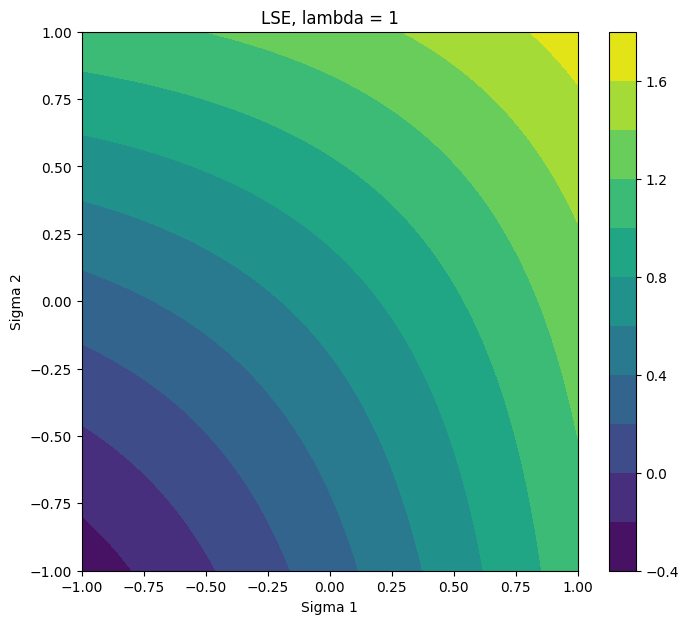

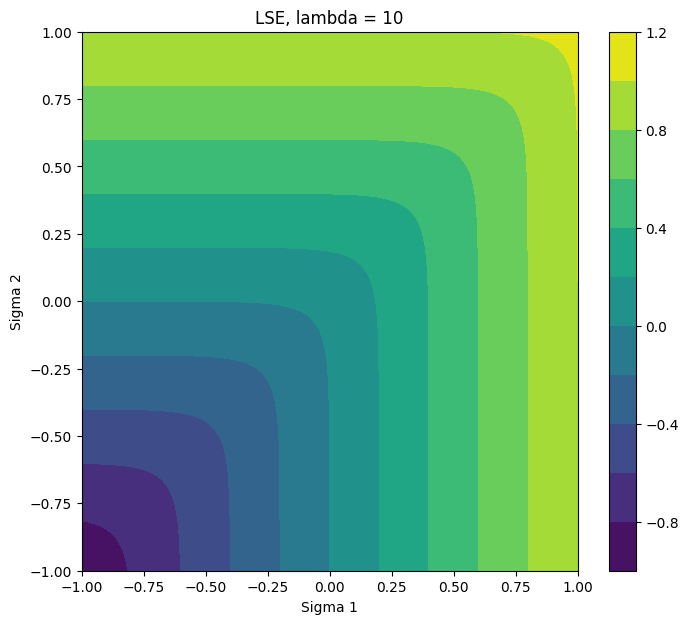

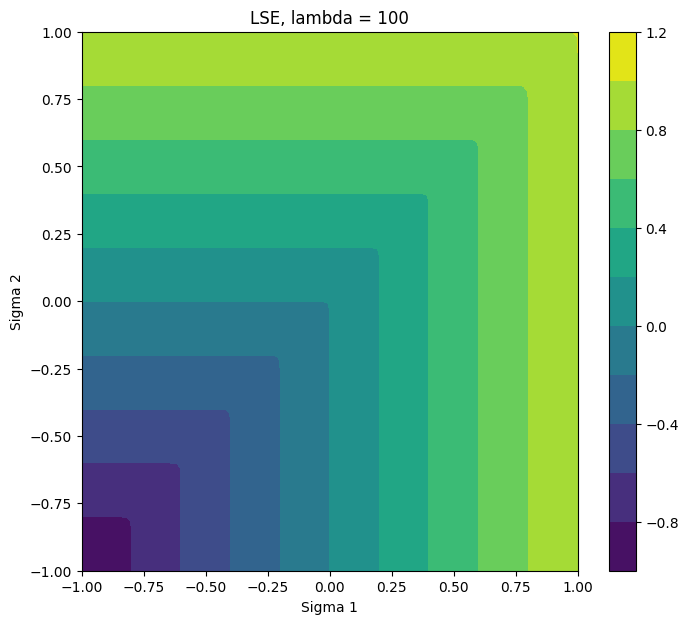

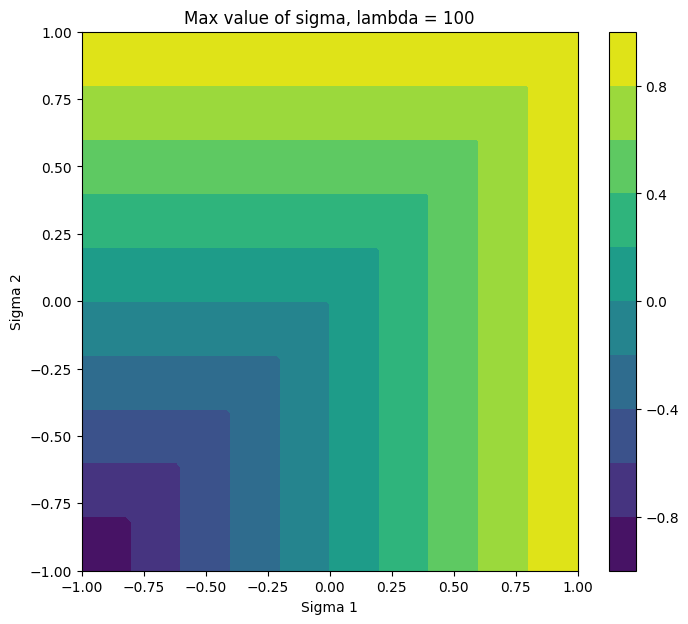

In [ ]:
sigma_1, sigma_2 = np.linspace(-1, 1, 100), np.linspace(-1, 1, 100)
lambdas = [1, 10, 100]

def lse(sigma_1, sigma_2, lambd):
    return (1/lambd)*np.log(np.exp(lambd*sigma_1) + np.exp(lambd*sigma_2))

lse = np.vectorize(lse)

for lambd in lambdas:
    lse_list = []

    for i in range(len(sigma_1)):
        lse_list.append(lse(sigma_1[i], sigma_2, lambd))

    plt.figure(figsize=(8, 7))
    plt.title(f"LSE, lambda = {lambd}")
    plt.contourf(sigma_1, sigma_2, lse_list, levels=10)
    plt.xlabel("Sigma 1")
    plt.ylabel("Sigma 2")
    plt.colorbar()
    plt.show()

max_values = []
for i in range(len(sigma_1)):
  max_values.append(np.maximum(sigma_1[i], sigma_2))

plt.figure(figsize=(8, 7))
plt.title(f"Max value of sigma, lambda = {lambd}")
plt.contourf(sigma_1, sigma_2, max_values, levels=10)
plt.xlabel("Sigma 1")
plt.ylabel("Sigma 2")
plt.colorbar()
plt.show()

### (c)

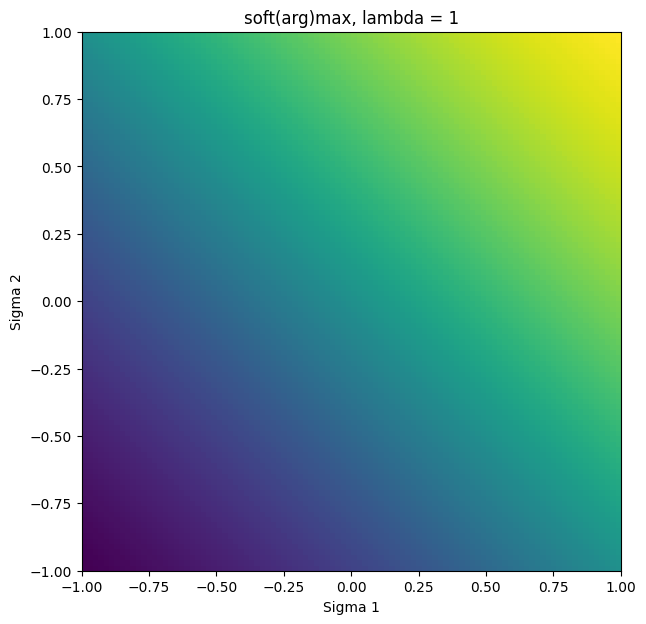

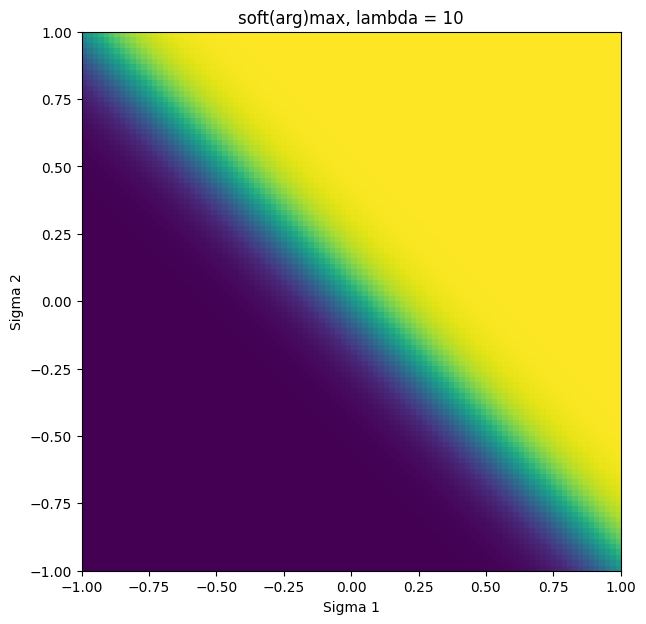

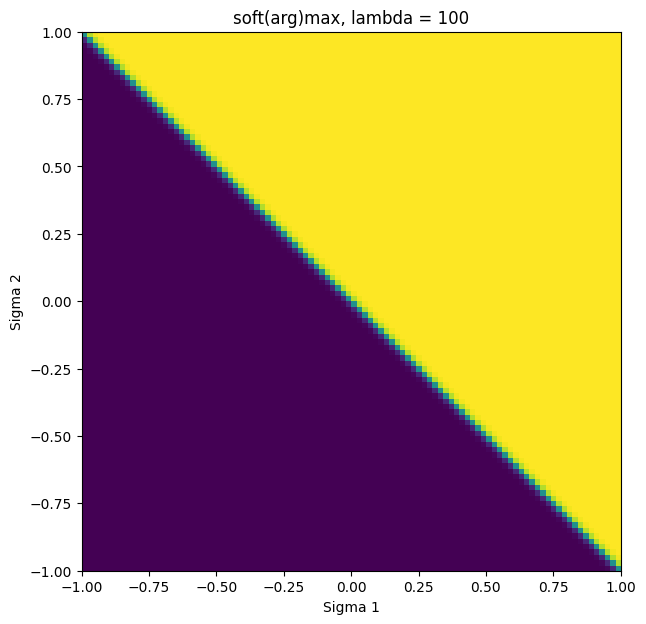

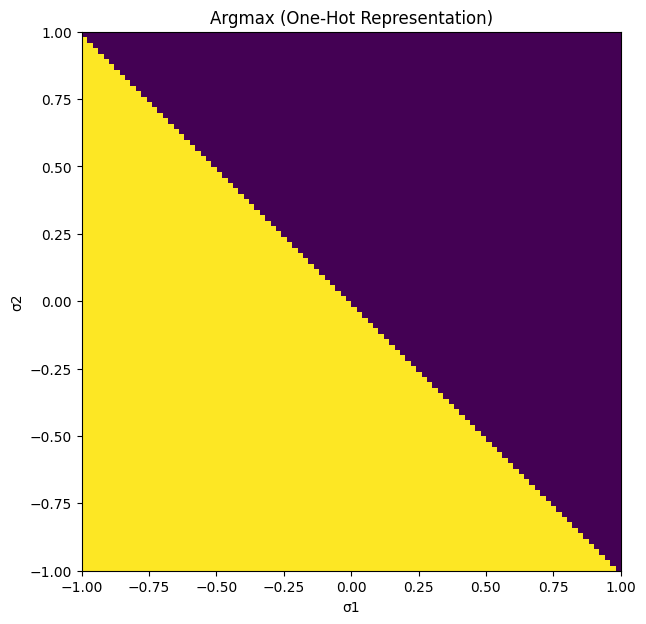

In [ ]:
def max_1(sigma_1, lambd):
    return (np.exp(lambd*sigma_1))/(np.exp(lambd*sigma_1) + np.exp(lambd*sigma_2))

def max_2(sigma_2, lambd):
    return (np.exp(lambd*sigma_2))/(np.exp(lambd*sigma_1) + np.exp(lambd*sigma_2))

max_1 = np.vectorize(max_1)
max_2 = np.vectorize(max_2)

for lambd in lambdas:
    max_1_list = []
    max_2_list = []

    for i in range(len(sigma_1)):
        max_1_list.append(max(sigma_1[i], sigma_2, lambd))
        max_2_list.append(max(sigma_2[i], sigma_1, lambd))

    max_1_list = np.array(max_1_list)
    max_2_list = np.array(max_2_list)

    plt.figure(figsize=(8, 7))
    plt.title(f"soft(arg)max, lambda = {lambd}")
    plt.imshow(max_1_list, extent=(-1, 1, -1, 1))
    plt.imshow(max_2_list, extent=(-1, 1, -1, 1))
    plt.xlabel("Sigma 1")
    plt.ylabel("Sigma 2")
    plt.show()

onehot = []
for i in range(len(sigma_1)):
    onehot.append(np.where(sigma_1[i] > sigma_2, 1, 0))

plt.figure(figsize=(8, 7))
plt.imshow(onehot, extent=(-1, 1, -1, 1))
plt.title("Argmax (One-Hot Representation)")
plt.xlabel("σ1")
plt.ylabel("σ2")
plt.show()

## 4 Linear regions of MLPs

# a

In [10]:
import torch
import torch.nn as nn

# Part (a): Define the Shallow Model
class ShallowMLP(nn.Module):
    def __init__(self):
        super(ShallowMLP, self).__init__()
        self.hidden = nn.Linear(2, 20)  # 2 inputs, 20 neurons in hidden layer
        self.relu = nn.ReLU()
        self.output = nn.Linear(20, 1)  # 20 neurons to 1 output

    def forward(self, x):
        x = self.relu(self.hidden(x))
        return self.output(x)

model = ShallowMLP()
num_params = sum(p.numel() for p in model.parameters())
print(f"Number of parameters in the model: {num_params}")

Number of parameters in the model: 81


# b

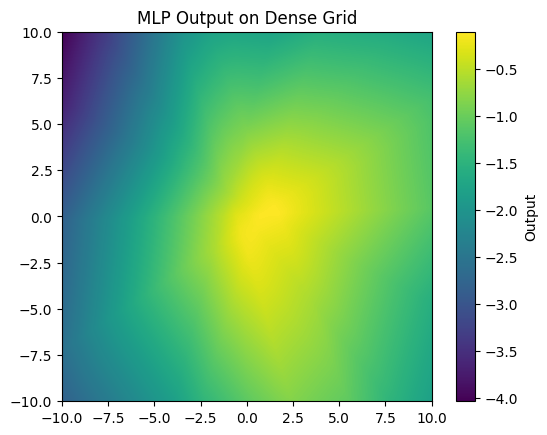

In [16]:
grid_size = 500

# Create 1D arrays for x and y axes
x = np.linspace(-10, 10, grid_size)
y = np.linspace(-10, 10, grid_size)


# Create a 2D grid using meshgrid
xx, yy = np.meshgrid(x, y)


# Combine x and y coordinates into a single array, with shape: (250000, 2)
grid = np.stack([xx.ravel(), yy.ravel()], axis=1)


# Convert the grid to a PyTorch tensor
grid_tensor = torch.tensor(grid, dtype=torch.float32)

# Compute outputs
with torch.no_grad():     # Disable gradient tracking for efficiency 
    outputs = model(grid_tensor).numpy().reshape(grid_size, grid_size)  # Convert the output to Numoy and reshape to (500, 500)

plt.imshow(outputs, extent=(-10, 10, -10, 10), origin='lower')
plt.colorbar(label="Output")
plt.title("MLP Output on Dense Grid")
plt.show()


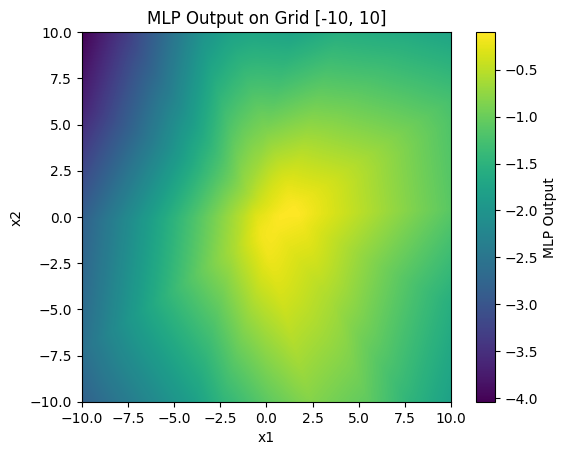

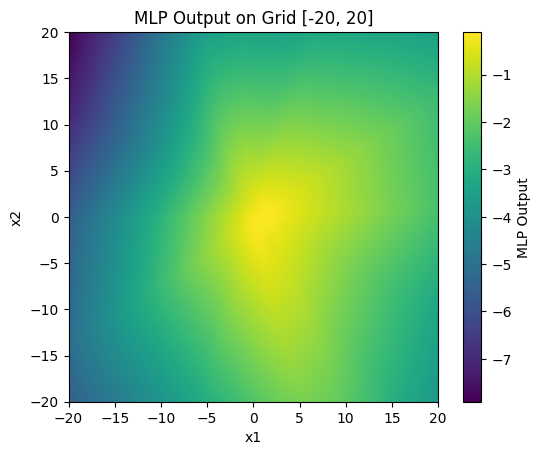

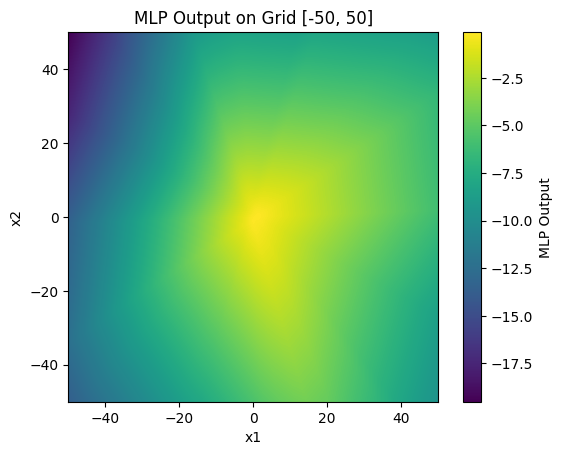

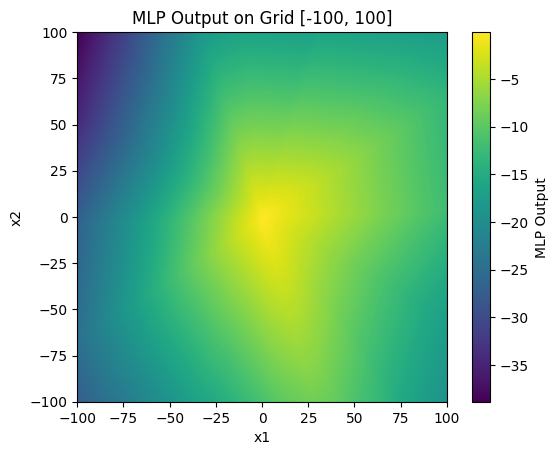

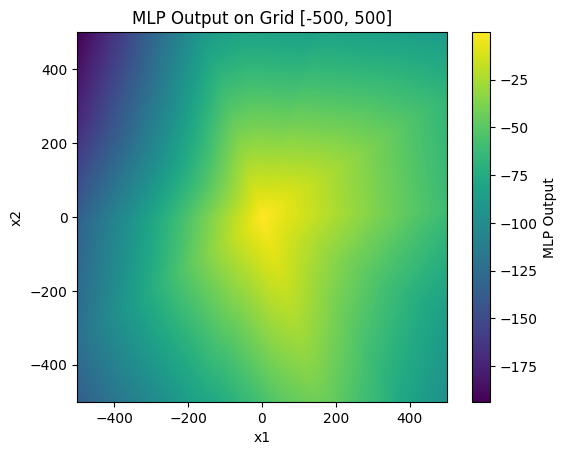

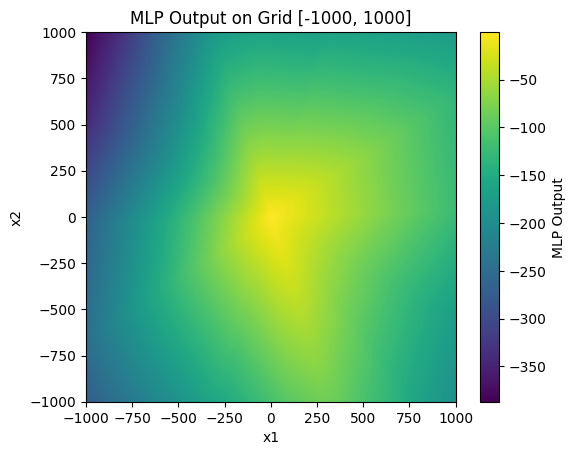

In [ ]:
#Let us see what happens with larger ranges. 
ranges = [10, 20, 50, 100, 500, 1000]  # Test different ranges
for r in ranges:
    x = np.linspace(-r, r, 500)
    y = np.linspace(-r, r, 500)
    xx, yy = np.meshgrid(x, y)
    grid = np.stack([xx.ravel(), yy.ravel()], axis=1)

    grid_tensor = torch.tensor(grid, dtype=torch.float32)
    with torch.no_grad():
        outputs = model(grid_tensor).numpy()

    outputs_reshaped = outputs.reshape(500, 500)
    plt.imshow(outputs_reshaped, extent=(-r, r, -r, r), origin='lower', cmap='viridis')
    plt.colorbar(label="MLP Output")
    plt.title(f"MLP Output on Grid [-{r}, {r}]")
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.show()


For small ranges the heatmap shows distinct patterns with sharp transitions (boundaries where the MLP output changes abruptly).
These transitions are caused by the ReLU activation applied after the hidden layer. The patterns continue to grow outward but might become repetitive or less complex, when incrementing the range. When the range is too large, the output often flattens, meaning the values stay constant or vary minimally.

This happens because the weights and biases of the MLP tend to limit the sensitivity to very large inputs, especially for randomly initialized networks. The ReLU activation introduces linear regions. Beyond certain input magnitudes, the ReLU might "turn off" some neurons, leading to constant outputs.

# c

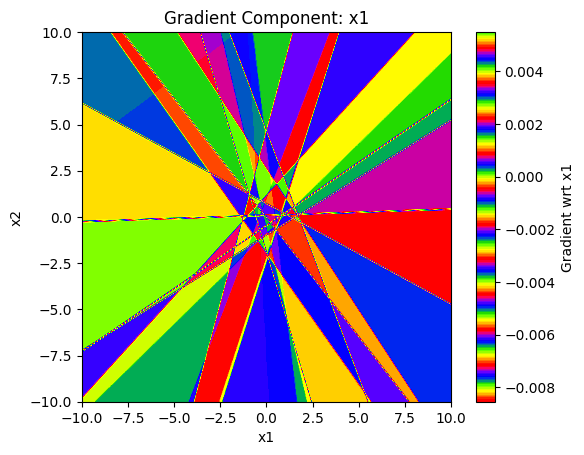

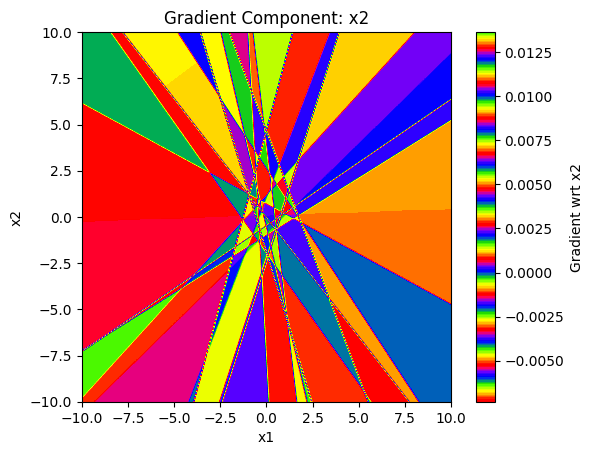

In [22]:
# Compute gradients along the x and y axes
grad_x, grad_y = np.gradient(outputs)  # Approximate derivatives

# Gradient with respect to x1
plt.imshow(grad_x, extent=(-10, 10, -10, 10), origin='lower', cmap='prism')
plt.colorbar(label="Gradient wrt x1")
plt.title("Gradient Component: x1")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

# Gradient with respect to x2
plt.imshow(grad_y, extent=(-10, 10, -10, 10), origin='lower', cmap='prism')
plt.colorbar(label="Gradient wrt x2")
plt.title("Gradient Component: x2")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()


We can see a precise linearity in the heatmaps using the prism colorbar. The gradient heatmaps highlight the piecewise linearity introduced by the ReLU activation.
Within each linear region, the gradients are nearly constant.
The sharp transitions (high gradient values) correspond to boundaries where the ReLU activation switches from active to inactive for certain neurons.

# d

In [ ]:
# Define the deeper MLP model
class DeepMLP(nn.Module):
    def __init__(self):
        super(DeepMLP, self).__init__()
        # Define layers
        self.hidden1 = nn.Linear(2, 5)  # First hidden layer: input (2) -> hidden (5)
        self.hidden2 = nn.Linear(5, 5)  # Second hidden layer: hidden (5) -> hidden (5)
        self.hidden3 = nn.Linear(5, 5)  # Third hidden layer: hidden (5) -> hidden (5)
        self.hidden4 = nn.Linear(5, 5)  # Fourth hidden layer: hidden (5) -> hidden (5)
        self.output = nn.Linear(5, 1)   # Output layer: hidden (5) -> output (1)
        self.relu = nn.ReLU()           # ReLU activation function

    def forward(self, x):
        # Forward pass
        x = self.relu(self.hidden1(x))  # Pass through first hidden layer and ReLU
        x = self.relu(self.hidden2(x))  # Pass through second hidden layer and ReLU
        x = self.relu(self.hidden3(x))  # Pass through third hidden layer and ReLU
        x = self.relu(self.hidden4(x))  # Pass through fourth hidden layer and ReLU
        x = self.output(x)              # Final output layer
        return x

# Instantiate the model and calculate the number of parameters
model = DeepMLP()
num_params = sum(p.numel() for p in model.parameters())
print(f"Number of parameters in the model: {num_params}")


Number of parameters in the model: 111


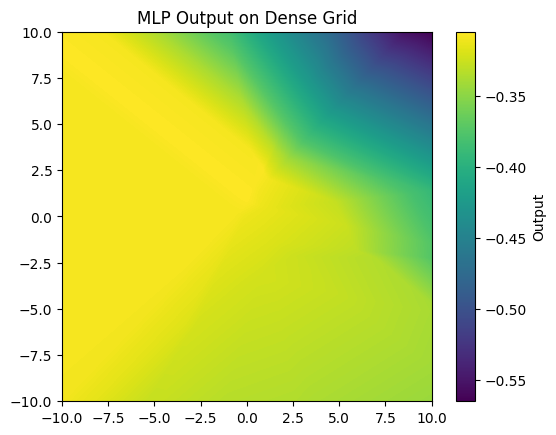

In [26]:
grid_size = 500

# Create 1D arrays for x and y axes
x = np.linspace(-10, 10, grid_size)
y = np.linspace(-10, 10, grid_size)


# Create a 2D grid using meshgrid
xx, yy = np.meshgrid(x, y)


# Combine x and y coordinates into a single array, with shape: (250000, 2)
grid = np.stack([xx.ravel(), yy.ravel()], axis=1)


# Convert the grid to a PyTorch tensor
grid_tensor = torch.tensor(grid, dtype=torch.float32)

# Compute outputs
with torch.no_grad():     # Disable gradient tracking for efficiency 
    outputs = model(grid_tensor).numpy().reshape(grid_size, grid_size)  # Convert the output to Numoy and reshape to (500, 500)

plt.imshow(outputs, extent=(-10, 10, -10, 10), origin='lower')
plt.colorbar(label="Output")
plt.title("MLP Output on Dense Grid")
plt.show()

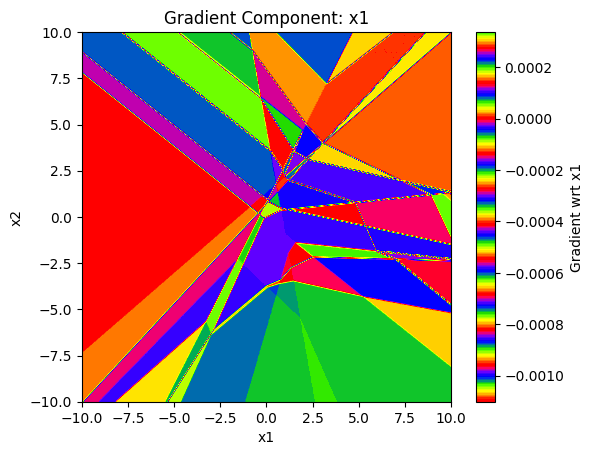

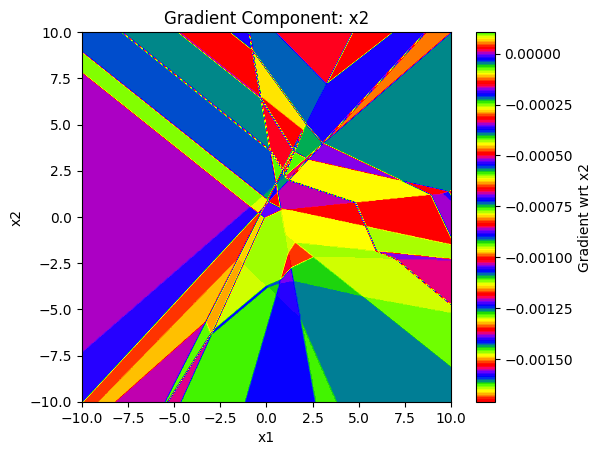

In [27]:
# Compute gradients along the x and y axes
grad_x, grad_y = np.gradient(outputs)  # Approximate derivatives

# Gradient with respect to x1
plt.imshow(grad_x, extent=(-10, 10, -10, 10), origin='lower', cmap='prism')
plt.colorbar(label="Gradient wrt x1")
plt.title("Gradient Component: x1")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

# Gradient with respect to x2
plt.imshow(grad_y, extent=(-10, 10, -10, 10), origin='lower', cmap='prism')
plt.colorbar(label="Gradient wrt x2")
plt.title("Gradient Component: x2")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()


The shallow model presents fewer regions with linear boundaries. Gradients change more sharply, leading to larger gradient magnitudes, while deep model presents highly fragmented regions with curved, intricate boundaries. Gradients are smoother with smaller magnitudes.